In [1]:
!pip install pandas matplotlib seaborn numpy

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from matplotlib import font_manager
from pandas.api.types import CategoricalDtype


In [2]:
# Ruta al TTF estático
font_path = r"D:\Escritorio\Code\Graficar\static\Roboto-Regular.ttf"

# Agregar la fuente a Matplotlib
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Roboto'

Dataframe con los resultados históricos

In [6]:
df_final = pd.DataFrame({
    'ciclo': [2021, 2023] + list(range(2024, 2046)),

    'Observado': [16224.90, 15738.95] + [np.nan] * 22,

    'Inercial': [np.nan, np.nan] + [
        15659.79, 15581.02, 15502.65, 15424.68, 15347.10, 15269.90, 15193.10,
        15116.68, 15040.65, 14965.00, 14889.73, 14814.84, 14740.32, 14666.18,
        14592.41, 14519.02, 14445.99, 14373.33, 14301.04, 14229.10, 14157.54, 14086.33],

    'Deseable': [np.nan, np.nan] + [
         15620.21, 15502.36, 15385.40, 15269.32, 15154.12, 15039.79, 14926.32,
        14813.70, 14701.94, 14591.02, 14480.93, 14371.68, 14263.25, 14155.64,
        14048.84, 13942.85, 13837.65, 13733.25, 13629.64, 13526.81, 13424.75, 13323.47],
    
    'Transformador': [np.nan, np.nan] + [
        15501.46, 15267.55, 15037.18, 14810.28, 14586.80, 14366.70, 14149.91,
        13936.40, 13726.11, 13518.99, 13315.00, 13114.09, 12916.21, 12721.31,
        12529.35, 12340.30, 12154.09, 11970.69, 11790.06, 11612.16, 11436.94, 11264.37]
    
})

print(df_final.head())

   ciclo  Observado  Inercial  Deseable  Transformador
0   2021   16224.90       NaN       NaN            NaN
1   2023   15738.95       NaN       NaN            NaN
2   2024        NaN  15659.79  15620.21       15501.46
3   2025        NaN  15581.02  15502.36       15267.55
4   2026        NaN  15502.65  15385.40       15037.18


In [8]:
#Parámetros
ano_base = 2024

In [9]:
# --- Configuración de estilo ---
plt.rcParams['font.family'] = 'Roboto'
sns.set_theme(style="whitegrid", font_scale=1.1)

plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

In [25]:
# Extender la línea Observado hasta el año base (conectarla a Deseable 2024)
ultimo_obs = df_final.loc[df_final["ciclo"] == 2023, "Observado"].values[0]
valor_base = df_final.loc[df_final["ciclo"] == 2024, "Deseable"].values[0]

ext_obs = pd.DataFrame({
    "ciclo": [2023, 2024],
    "Observado": [ultimo_obs, valor_base]
})

# Combinar con los datos observados
obs_ext = pd.concat([
    df_final[df_final["ciclo"] < 2024][["ciclo", "Observado"]],
    ext_obs
])


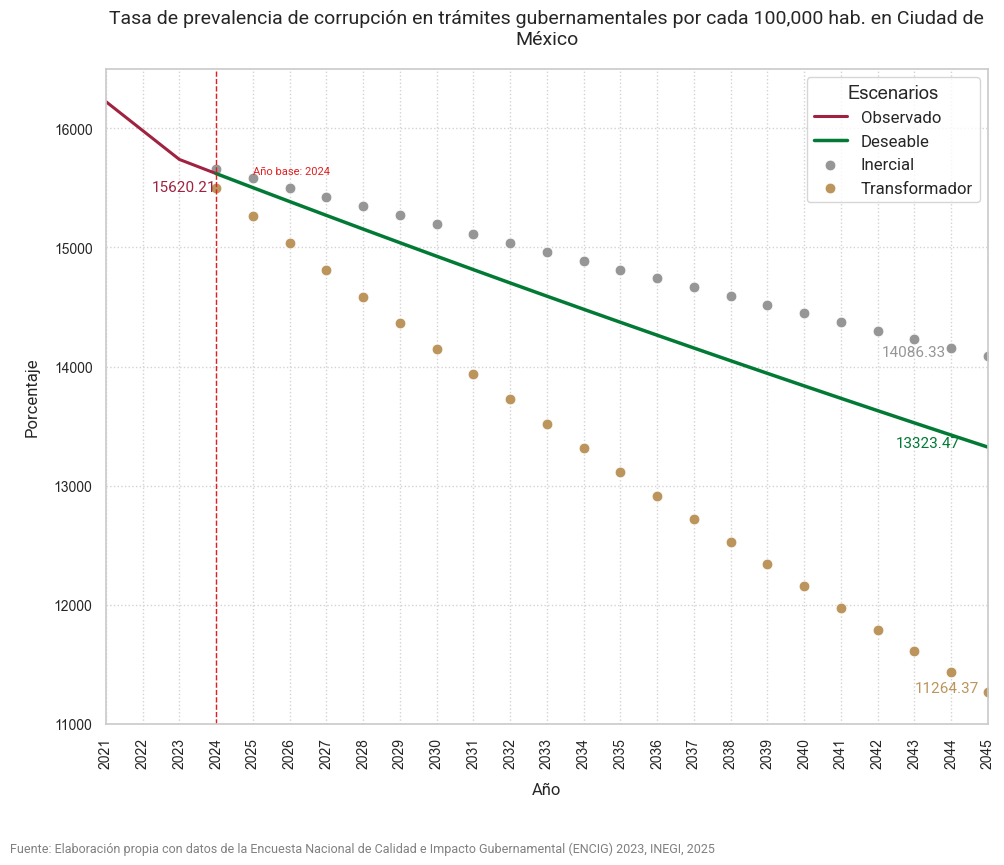

In [30]:
# --- Crear gráfico ---
plt.figure(figsize=(10, 8))

# 1. Observado (2015–2024)
obs = df_final[df_final["ciclo"] <= ano_base]
sns.lineplot(data=obs_ext, x="ciclo", y="Observado",
             color="#9F2241", linewidth=2.2, label="Observado")

# 2. Escenarios futuros (>=2024)
fut = df_final[df_final["ciclo"] >= ano_base]

# Deseable como línea verde
sns.lineplot(data=fut, x="ciclo", y="Deseable",
             color="#027a35", linewidth=2.5, label="Deseable")

# Inercial y Transformador como puntos
sns.scatterplot(data=fut, x="ciclo", y="Inercial",
                color="#969696", s=60, label="Inercial")
sns.scatterplot(data=fut, x="ciclo", y="Transformador",
                color="#BC955C", s=60, label="Transformador")

# --- Línea vertical año base ---
plt.axvline(x=ano_base, color="#E21F1F", linestyle="dashed", linewidth=1)
plt.text(ano_base + 1, df_final["Deseable"].max()*1.0,
         f"Año base: {ano_base}", fontsize=8, color="#E21F1F", fontfamily='Roboto')

# --- Etiquetas de valores corregidas (dentro del margen) ---
# Observado (año base)
valor_base = df_final.loc[df_final["ciclo"] == ano_base, "Deseable"].values[0]
plt.text(ano_base - 1.75, valor_base - 150, f"{valor_base:.2f}",
         fontsize=11, color="#9F2241", weight="bold", fontfamily='Roboto')

# Deseable 2045
valor_des = df_final.loc[df_final["ciclo"] == 2045, "Deseable"].values[0]
plt.text(2045 - 2.5, valor_des, f"{valor_des:.2f}",
         fontsize=11, color="#027a35", weight="bold", fontfamily='Roboto')

# Inercial 2045
valor_iner = df_final.loc[df_final["ciclo"] == 2045, "Inercial"].values[0]
plt.text(2045 - 2.9, valor_iner, f"{valor_iner:.2f}",
         fontsize=11, color="#969696", weight="bold", fontfamily='Roboto')

# Transformador 2045
valor_trans = df_final.loc[df_final["ciclo"] == 2045, "Transformador"].values[0]
plt.text(2045 - 2, valor_trans, f"{valor_trans:.2f}",
         fontsize=11, color="#BC955C", weight="bold", fontfamily='Roboto')

# --- Ejes, título y leyenda ---
plt.title(
    "Tasa de prevalencia de corrupción en trámites gubernamentales por cada 100,000 hab. en Ciudad de México",
    fontsize=14, loc="center", wrap=True, weight="bold", fontfamily='Roboto', pad=20
)
plt.xlabel("Año", fontfamily='Roboto', labelpad=10)
plt.ylabel("Porcentaje", fontfamily='Roboto', labelpad=10)

plt.ylim(11000, 16500)
plt.xlim(df_final["ciclo"].min(), df_final["ciclo"].max())
plt.xticks(range(2021, 2046, 1), rotation=90)
plt.legend(title="Escenarios", loc="best", frameon=True, prop={'family': 'Roboto'})

plt.figtext(
    0.0, -0.05,
    "Fuente: Elaboración propia con datos de la Encuesta Nacional de Calidad e Impacto Gubernamental (ENCIG) 2023, INEGI, 2025",
    ha="left", fontsize=9, color="gray", fontfamily='Roboto'
)

plt.gca().set_facecolor("white")
plt.grid(True, linestyle=":", color="lightgray")

plt.tight_layout()
plt.savefig("grafica_prev_corrup.png", dpi=200, bbox_inches="tight", facecolor="white")
plt.show()